# Prototypage de classifeur

Prototypage de de classifeur en utilisant des boolean index en cascade (for the speed and the lolz!)

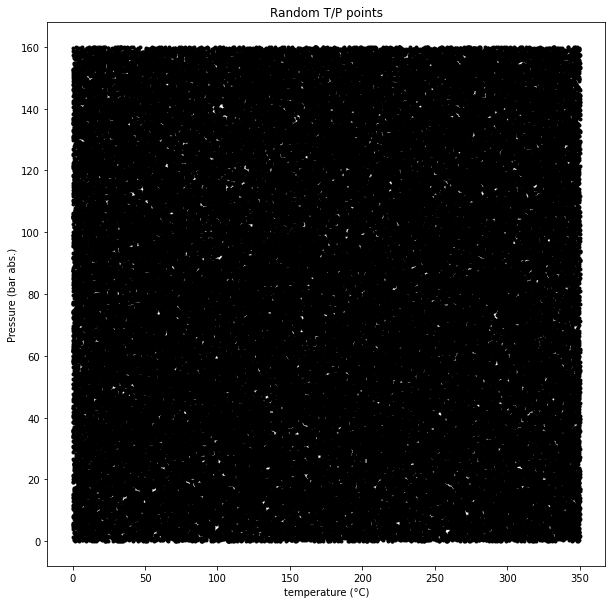

In [3]:
import numpy as np


def random_array(size, dim=2):
    """
    Generate a random array of temperature (0-350°c) and pressure (0-160 bar)
    """
    return np.random.rand(int(size), dim) * np.array([350,160])

# Generate a random array of size 1e5
array = random_array(1e5)

# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.title('Random T/P points')
plt.xlabel('temperature (°C)')
plt.ylabel('Pressure (bar abs.)')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.show()

## Découpe en cadran
Découpe des données en quadrant afin de gagner du temps sur les filtrages plus complexe.

https://fr.wikipedia.org/wiki/Quadrant_(math%C3%A9matiques)

Boolean index Quandrant I:	2.97 ms ± 28 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


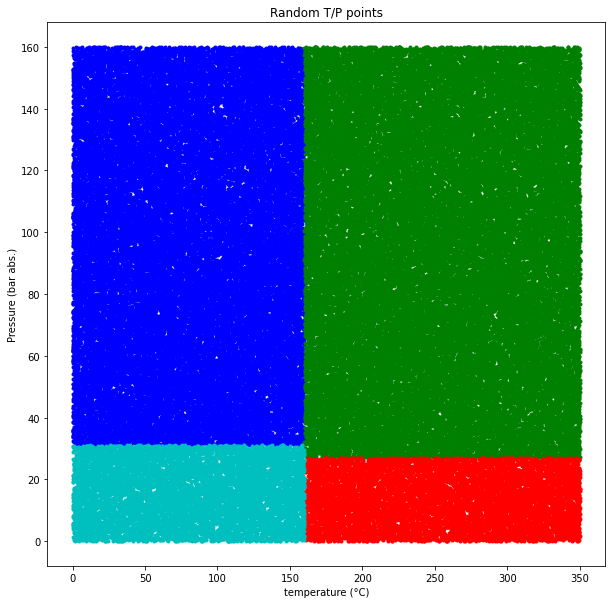

In [40]:
def quadrant_index(array):
    """
    Takes a numpy array cut it into four qudrant following two axis, [160, :] and [: , ]
    """
    index_1 = (array[:, 0] < 160) & (array[:, 1] > 31)   # out of domaine quadrant I
    index_2 = (array[:, 0] >= 160) & (array[:, 1] >= 27) # AN/GV quadrant II
    index_3 = (array[:, 0] >= 160) & (array[:, 1] < 27)  # out of domaine quadrant III
    index_4 = (array[:, 0] < 160) & (array[:, 1] <= 31)  # API/APR quandrant III
    
    return  (array[index_1], array[index_2], array[index_3], array[index_4]) 

print('Boolean index Quandrant I:\t', end='')
#%timeit quadrant is quadrant_index(array)
%timeit quadrant = quadrant_index(array)

plt.figure(figsize=(10, 10))
plt.title('Random T/P points')
plt.xlabel('temperature (°C)')
plt.ylabel('Pressure (bar abs.)')
plt.plot(quadrant[0][:, 0], quadrant[0][:, 1], 'b.')
plt.plot(quadrant[1][:, 0], quadrant[1][:, 1], 'g.')
plt.plot(quadrant[2][:, 0], quadrant[2][:, 1], 'r.')
plt.plot(quadrant[3][:, 0], quadrant[3][:, 1], 'c.')
plt.show()

## API/APR 
Le plus simple, car c'est un simple rectange.

Boolean index API:	60.9 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


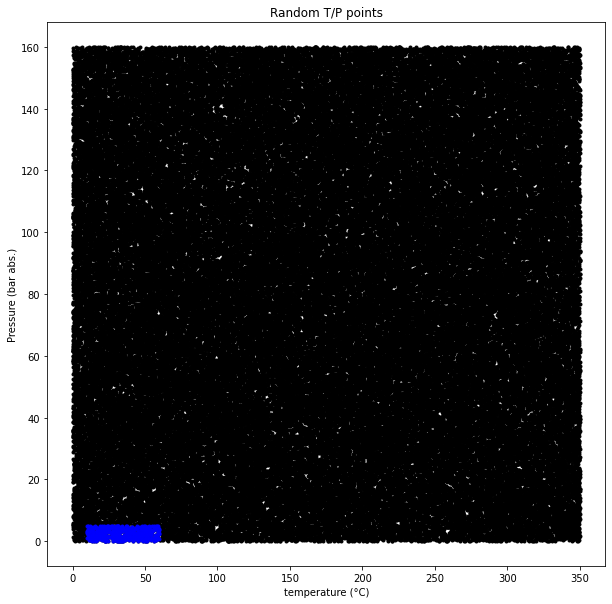

In [38]:
def api_index(array):
    """
    Takes a numpy array and isolates all points that are within [10,60] for
    the first dimension and between [0,5] for
    the second dimension by creating a boolean index.
    """
    index = (array[:, 0] >= 10) & (array[:, 1] >= 0) & (array[:, 0] <= 60) & (array[:, 1] < 5)
    

    return array[index]

print('Boolean index API:\t', end='')
%timeit api_data is api_index(quadrant[3]) 
plt.figure(figsize=(10, 10))
plt.title('Random T/P points')
plt.xlabel('temperature (°C)')
plt.ylabel('Pressure (bar abs.)')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.plot(api_data[:, 0], api_data[:, 1], 'b.')
plt.show()

## AN/RRA Filter

Un peu plus compliqué, la différence entre deux rectangles.

Boolean index AN/RRA:	129 µs ± 426 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


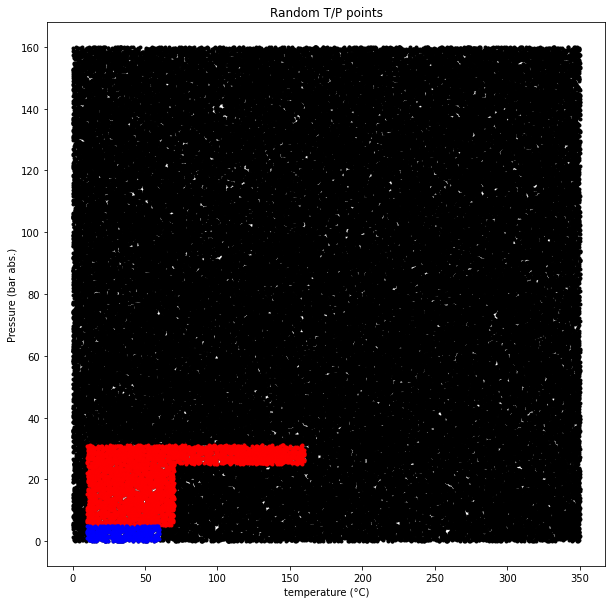

In [39]:
def anrra_index(array):
    """
    Takes a numpy array and isolates all points that are within [10,160] for
    the first dimension and between [5,31] for
    the second dimension by creating a boolean index.
    """
    index = (array[:, 0] >= 10) & (array[:, 1] >= 5) & (array[:, 0] <= 160) & (array[:, 1] <= 31) & np.logical_not((array[:, 0] >= 70) & (array[:, 1] < 25))
    

    return array[index]

print('Boolean index AN/RRA:\t', end='')
%timeit anrra_data is anrra_index(quadrant[3]) 

plt.figure(figsize=(10, 10))
plt.title('Random T/P points')
plt.xlabel('temperature (°C)')
plt.ylabel('Pressure (bar abs.)')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.plot(anrra_data[:, 0], anrra_data[:, 1], 'r.')
plt.plot(api_data[:, 0], api_data[:, 1], 'b.')
plt.show()

## AN/GV 
Les choses difficiles commences